In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.compose import ColumnTransformer

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataAnalytics/covid.csv')

In [ ]:
df['submission_date'] = pd.to_datetime(df['submission_date'])

In [ ]:
df = df.sort_values(by=['submission_date'], ascending=True)

In [ ]:
df_total_cases = df.groupby(by = 'submission_date')['tot_cases'].sum().reset_index(name = 'total_cases')

In [ ]:
df_total_cases.columns

Index(['submission_date', 'total_cases'], dtype='object')

In [ ]:
from scipy import stats
df_total_cases['total_cases'] = stats.zscore(df_total_cases['total_cases'], nan_policy='omit')

No handles with labels found to put in legend.


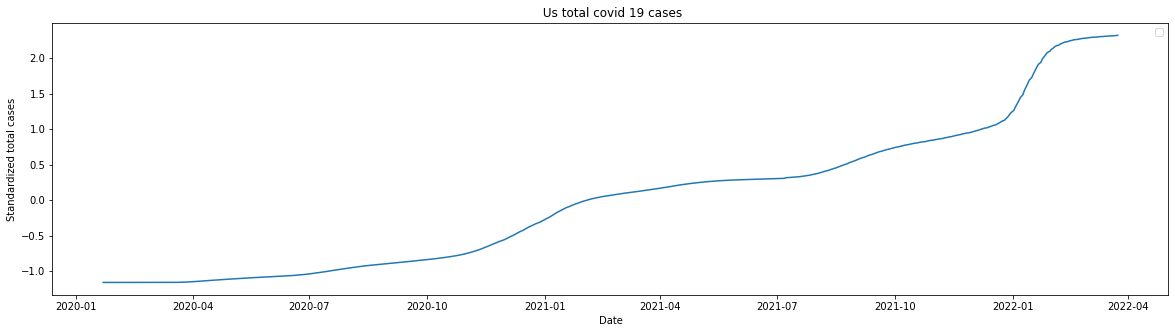

In [ ]:
plt.plot(df_total_cases['submission_date'],df_total_cases['total_cases'])
plt.xlabel('Date')
plt.ylabel('Standardized total cases')
plt.title(" Us total covid 19 cases")
plt.legend()
plt.show()

# daily

# combined figures

In [ ]:
Shopping_website = ['AMZN', 'EBAY', 'BABA', 'OSTK']
Tech = ['AAPL', 'AMZN', 'MSFT']
Education = ['ZM', 'MSFT']
Healthcare = ['JNJ', 'PFE', 'MRNA']
Entertainment = ['NETFLIX']
Socialmedia = ['TWTR', 'FB']

In [ ]:
def plot(names, feature, type):
  
  ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Close'])
    ], remainder='passthrough')
  plt.rcParams["figure.figsize"] = (20,5)
  for i in names:
    df = yf.download(i, start='2020-01-21', end='2022-04-20', progress=False)
    df['date'] = df.index
    df['Close'] = ct.fit_transform(df)
    price_by_stock = df['Close']
    plt.plot(df['date'],price_by_stock, label=i)
    # plt.plot(df['date'],df_total_cases['total_cases']) 
  plt.xlabel('Date')
  plt.ylabel('Standardized prices')
  plt.title(type + "'s stock price")
  plt.legend()
  plt.show()

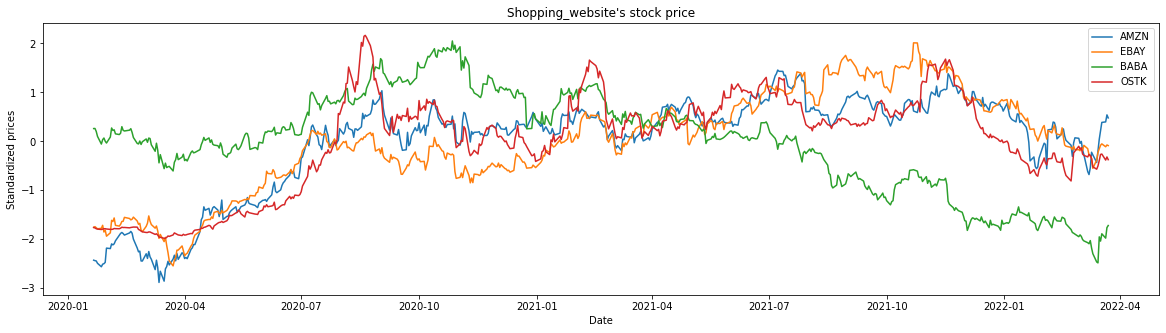

In [ ]:
plot(Shopping_website, 'Close', "Shopping_website")

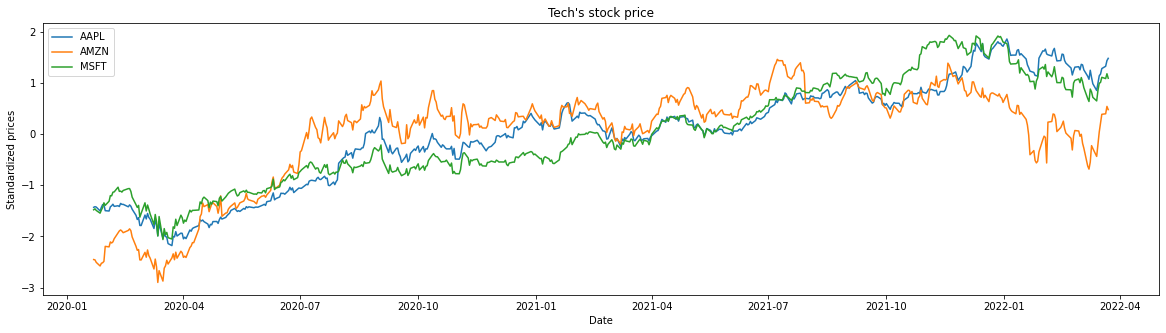

In [ ]:
plot(Tech, 'Close', 'Tech')

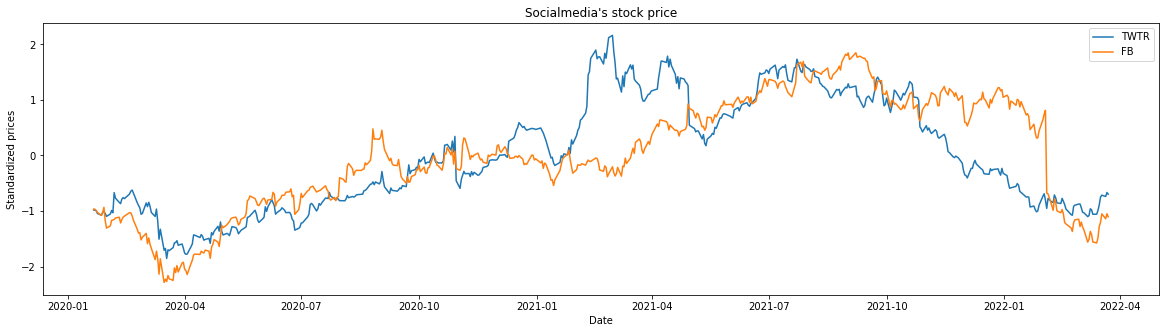

In [ ]:
plot(Socialmedia, 'Close', 'Socialmedia')

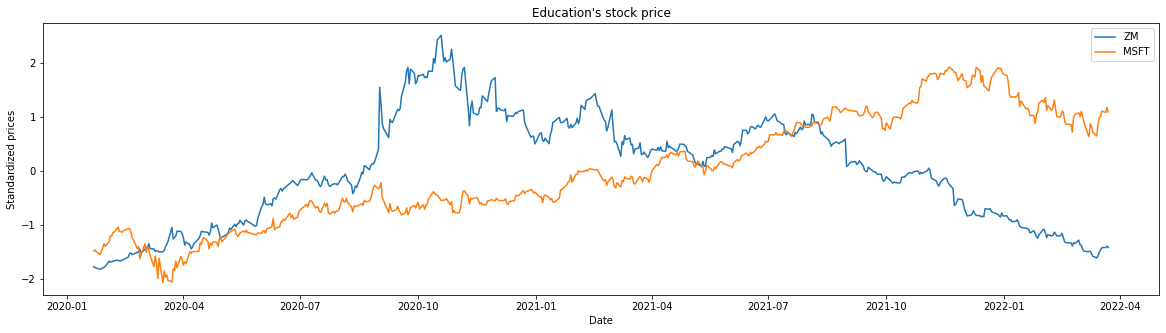

In [ ]:
plot(Education, 'Close', 'Education')

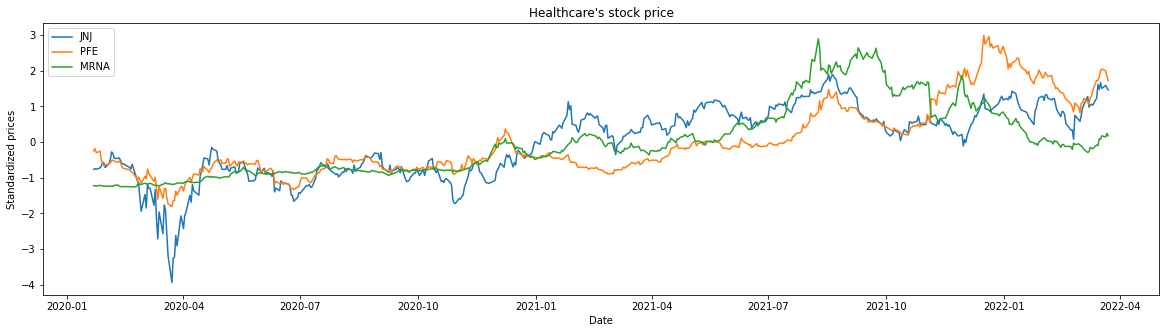

In [ ]:
plot(Healthcare, 'Close', 'Healthcare')

In [ ]:
# plot(Entertainment, 'Close', 'Entertainment')

In [ ]:
# def plot(name, feature, type):
#   ct = ColumnTransformer([
#         ('somename', StandardScaler(), ['Close'])
#     ], remainder='passthrough')
#   plt.rcParams["figure.figsize"] = (20,5)
#   df = yf.download(name, start='2020-02-03', end='2022-04-20', progress=False)
#   df['date'] = df.index
#   df['Close'] = ct.fit_traansform(df)
#   price_by_stock = df['Close']
#   plt.plot(df['date'],price_by_stock, label=name)
#   plt.xlabel('Date')
#   plt.ylabel('Standardized prices')
#   plt.title(type + "'s stock price")
#   plt.legend()
#   plt.show()

In [ ]:
# plot(Entertainment, 'Close', 'Entertainment')

# covid 19 begin

In [ ]:
def plot(name, feature):
  df = yf.download(name, start='2020-01-21', end='2022-04-20', progress=False)
  df[feature].plot(title=name + "'s stock price", figsize=(20, 5))

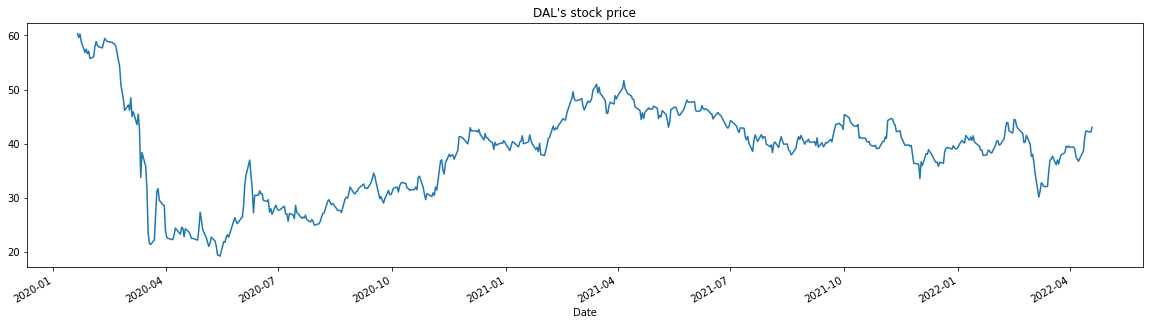

In [ ]:
plot('DAL', 'Close')

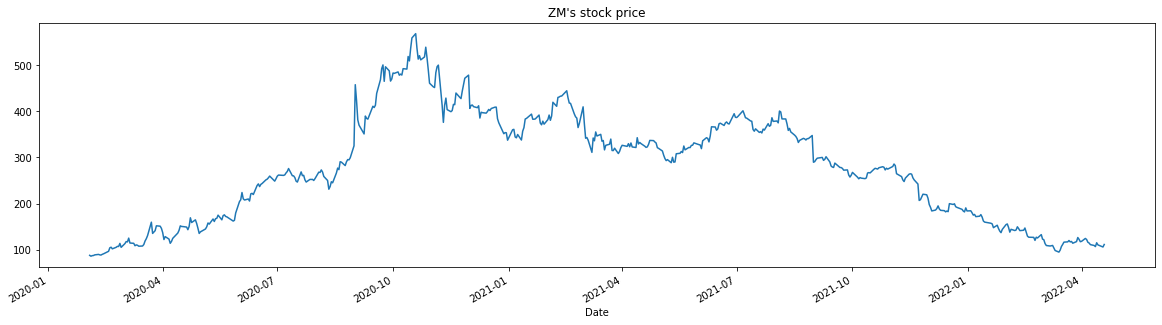

In [ ]:
plot('ZM', 'Close')

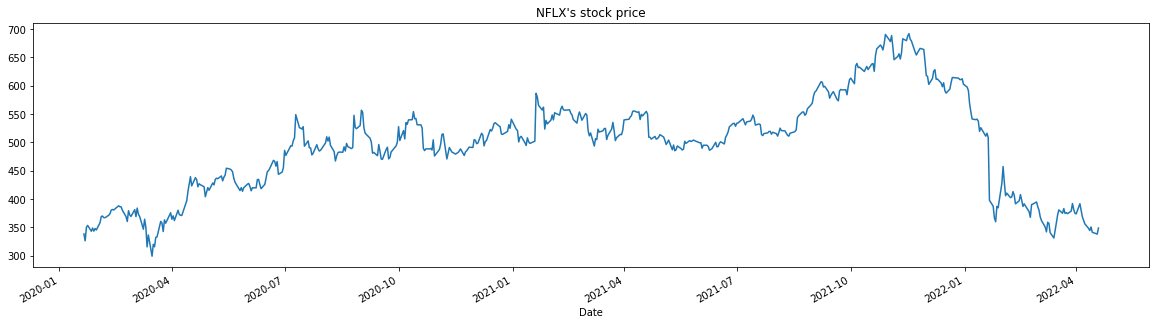

In [ ]:
plot('NFLX', 'Close')

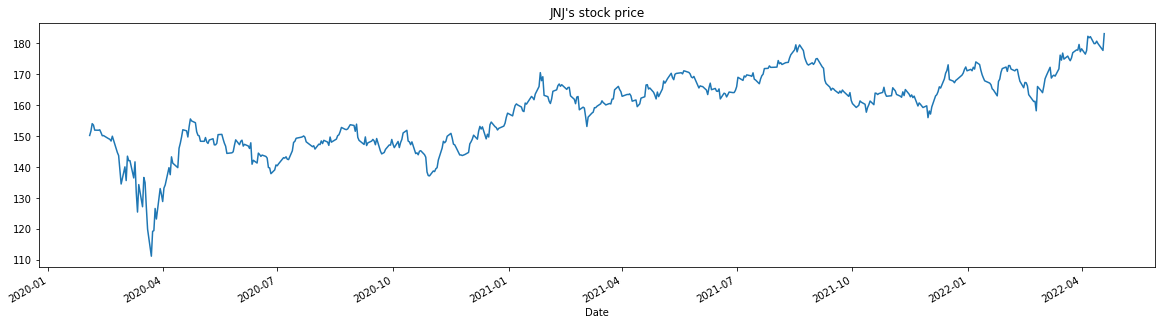

In [ ]:
plot('JNJ', 'Close')

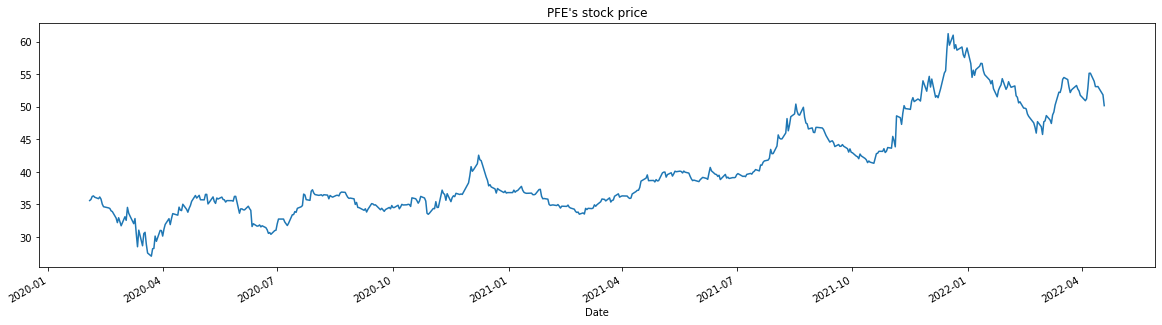

In [ ]:
plot('PFE', 'Close')

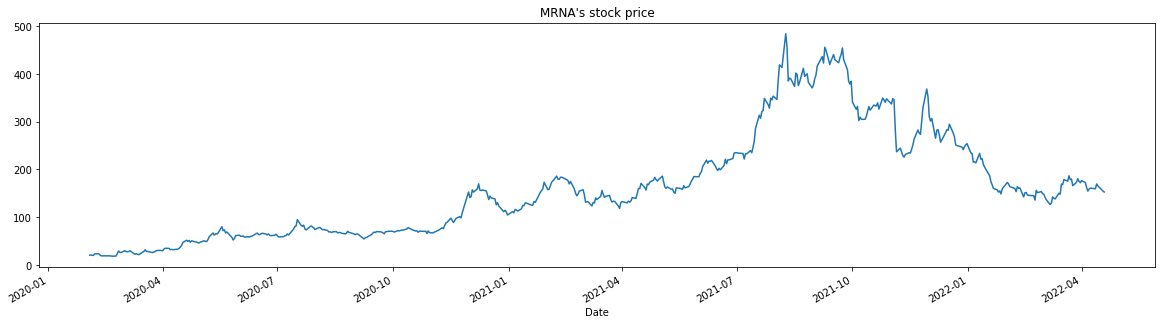

In [ ]:
plot('MRNA', 'Close')

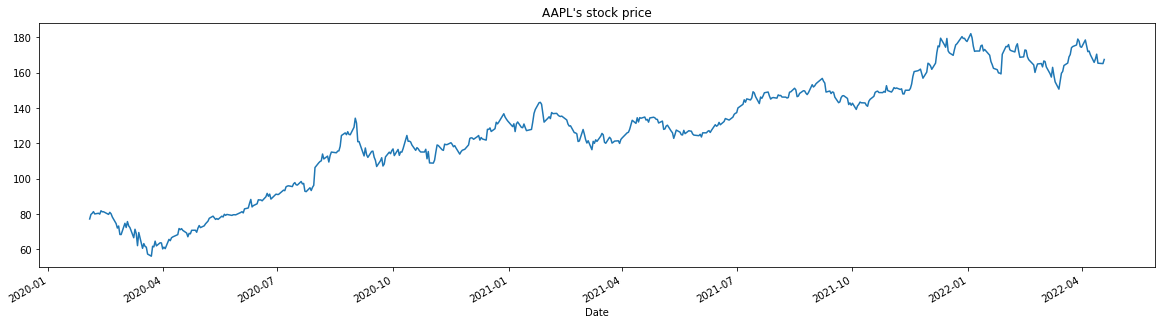

In [ ]:
plot('AAPL', 'Close')

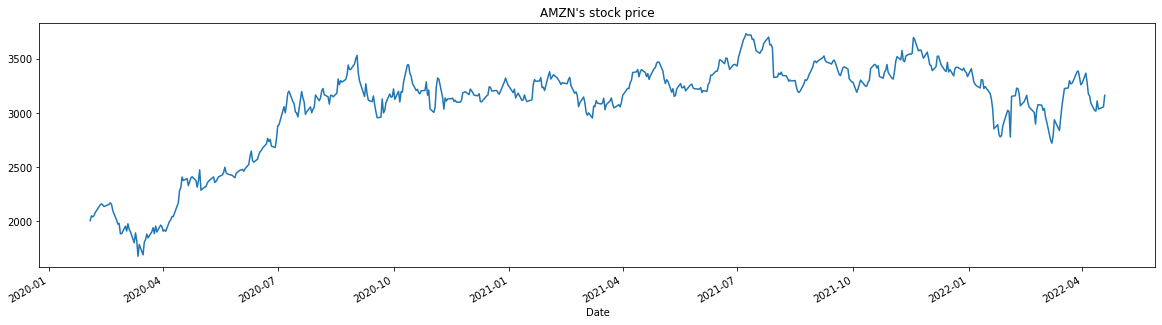

In [ ]:
plot('AMZN', 'Close')

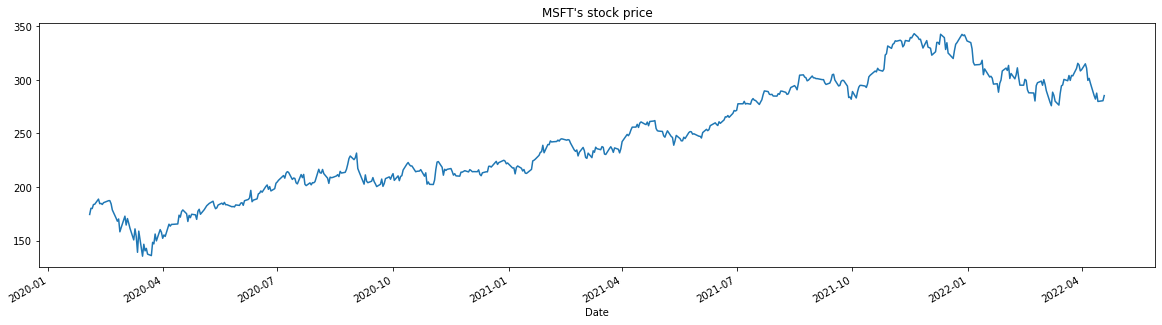

In [ ]:
plot('MSFT', 'Close')

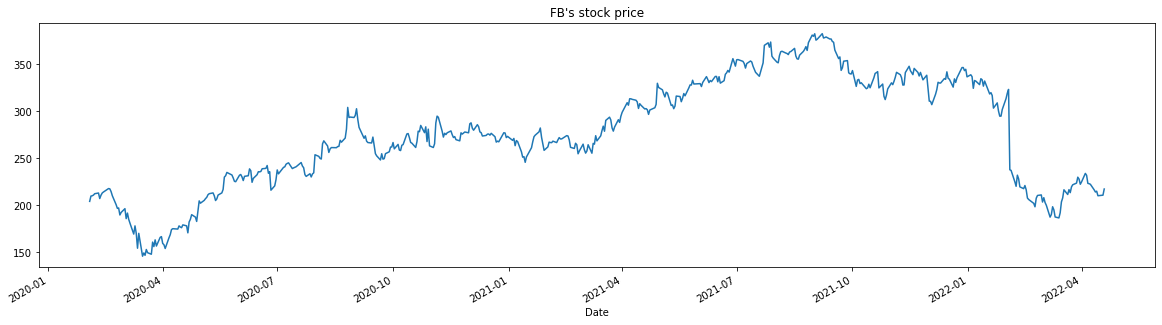

In [ ]:
plot('FB', 'Close')

# After vaccine comes out

In [ ]:
def plot_afterV(name, feature):
  df = yf.download(name, start='2020-07-01', end='2022-04-20', progress=False)
  df[feature].plot(title=name + "'s stock price", figsize=(20, 5))

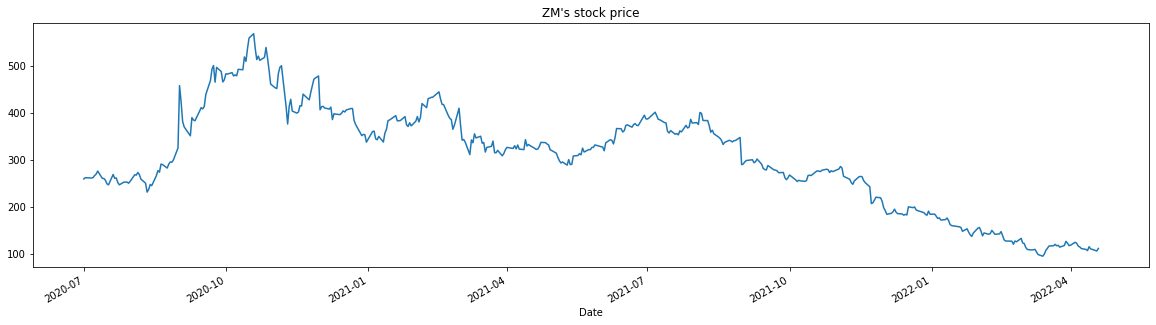

In [ ]:
plot_afterV('ZM', 'Close')

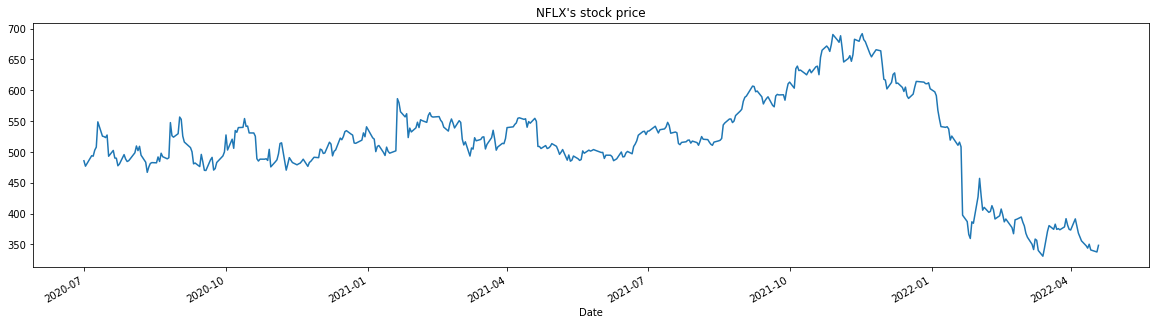

In [ ]:
plot_afterV('NFLX', 'Close')

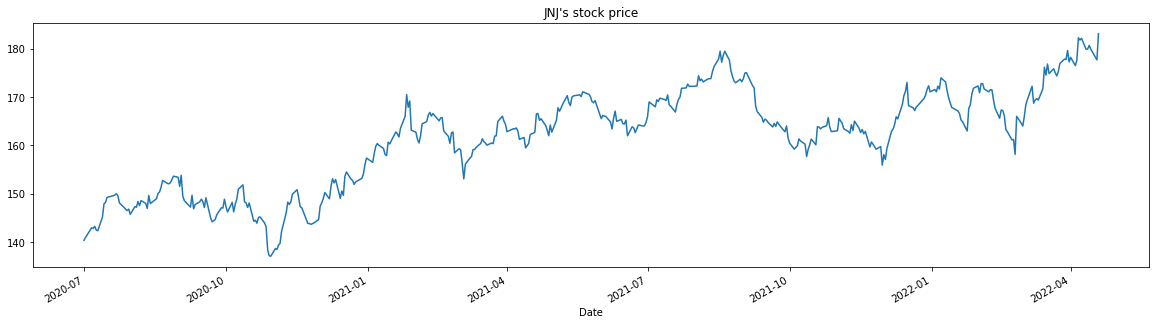

In [ ]:
plot_afterV('JNJ', 'Close')

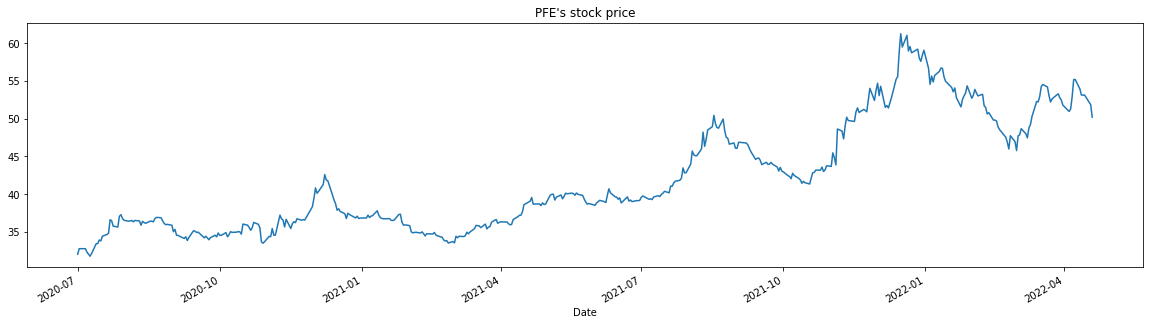

In [ ]:
plot_afterV('PFE', 'Close')

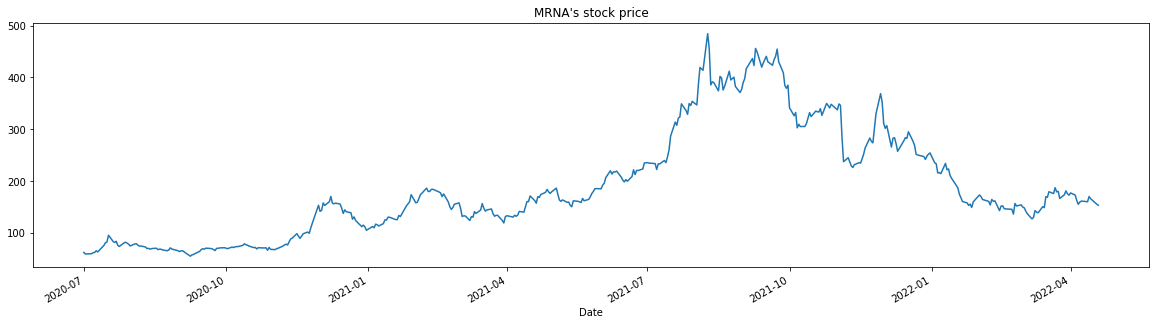

In [ ]:
plot_afterV('MRNA', 'Close')

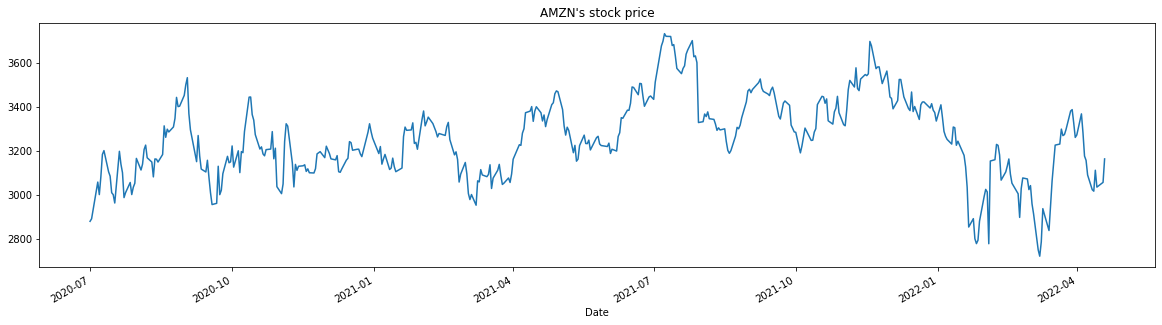

In [ ]:
plot_afterV('AMZN', 'Close')

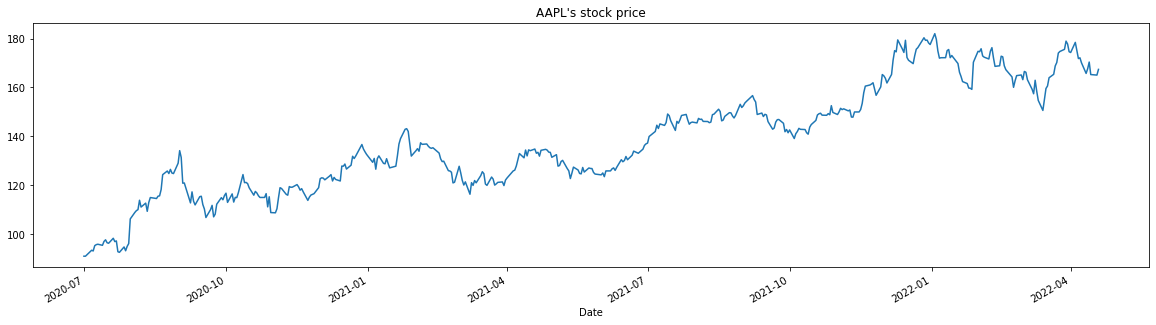

In [ ]:
plot_afterV('AAPL', 'Close')

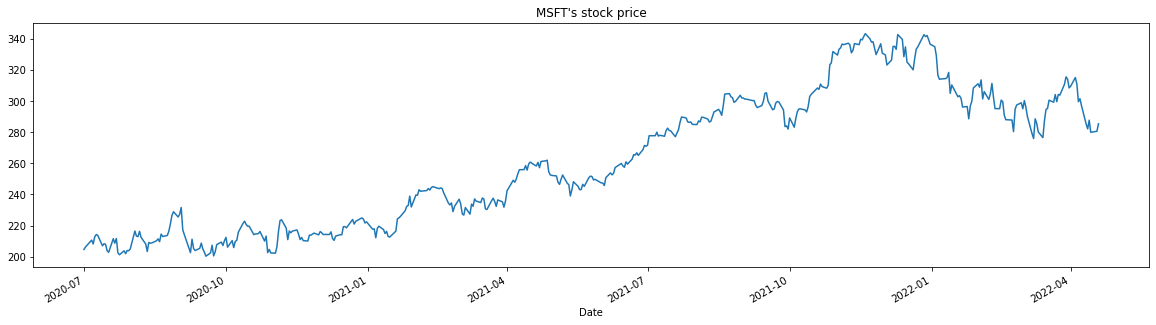

In [ ]:
plot_afterV('MSFT', 'Close') 

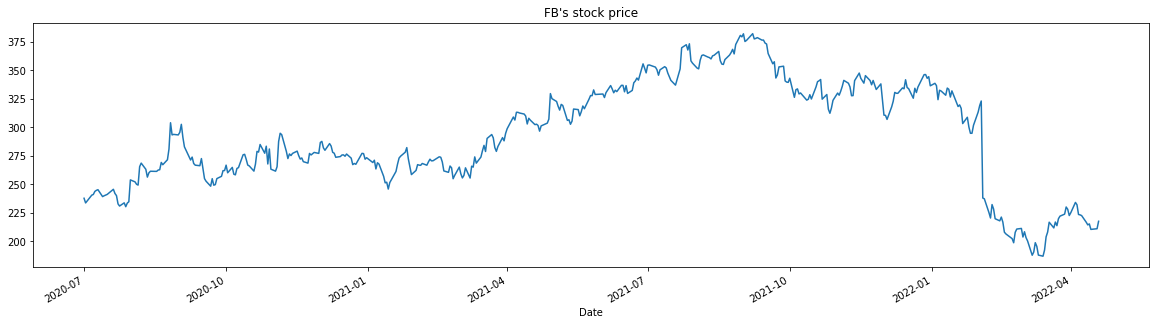

In [ ]:
plot_afterV('FB', 'Close')

In [ ]:
aapl_df = yf.download('AAPL', 
                      start='2020-02-03', 
                      end='2022-04-20', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03,76.074997,78.372498,75.555000,77.165001,75.938805,173788400
2020-02-04,78.827499,79.910004,78.407501,79.712502,78.445831,136616400
2020-02-05,80.879997,81.190002,79.737503,80.362503,79.085518,118826800
2020-02-06,80.642502,81.305000,80.065002,81.302498,80.010567,105425600
2020-02-07,80.592499,80.849998,79.500000,80.007500,78.923004,117684000


# five year trend

In [ ]:
def plot5y(name, feature):
  ticker = yf.Ticker(name)
  df = ticker.history(period="5y")
  df[feature].plot(title=name + "'s stock price", figsize=(20, 5))

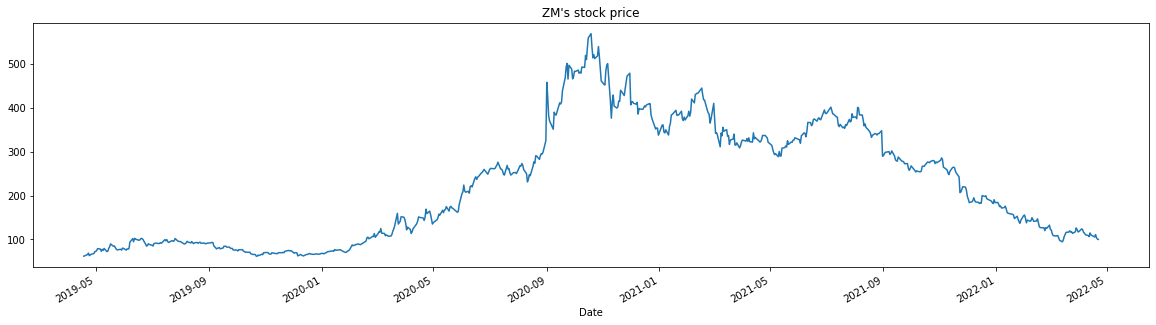

In [ ]:
plot5y('ZM', 'Close')

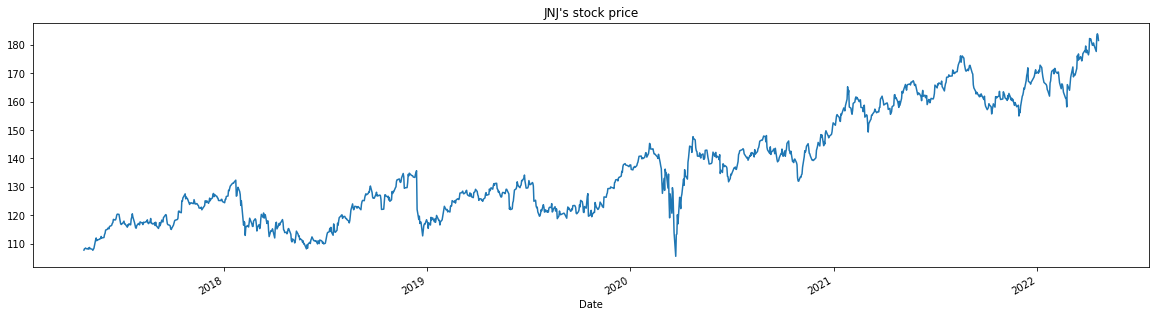

In [ ]:
plot5y('JNJ', 'Close')

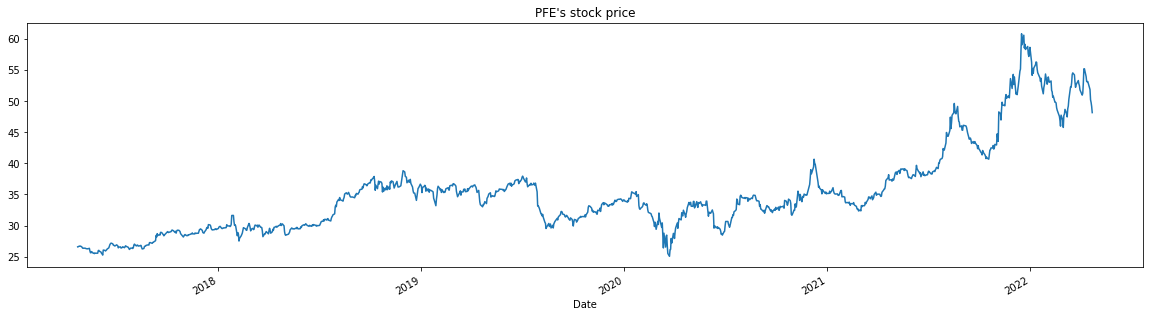

In [ ]:
plot5y('PFE', 'Close')

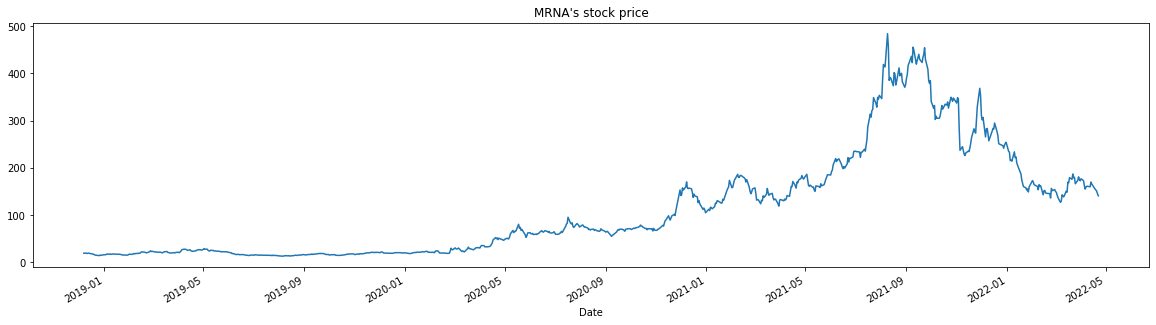

In [ ]:
plot5y('MRNA', 'Close')

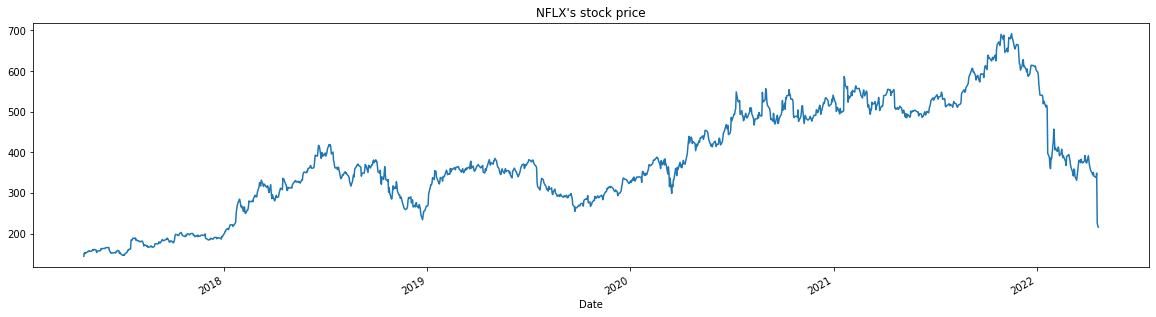

In [ ]:
plot5y('NFLX', 'Close')

# Weekly

In [ ]:
yahoo_financials = YahooFinancials('AAPL')
data = yahoo_financials.get_historical_price_data(start_date='2019-12-01', 
                                                  end_date='2021-12-31', 
                                                  time_interval='weekly')
aapl_df = pd.DataFrame(data['AAPL']['prices'])
aapl_df = aapl_df.drop('date', axis=1).set_index('formatted_date')
aapl_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-12-02,67.750000,64.072502,66.817497,67.677498,456599200,66.602074
2019-12-09,68.824997,66.227501,67.500000,68.787498,568117600,67.694435
2019-12-16,70.662498,69.245003,69.250000,69.860001,732720000,68.749886
2019-12-23,73.492500,70.092499,70.132500,72.449997,386438000,71.298729
2019-12-30,75.150002,71.305000,72.364998,74.357498,526723200,73.175926


# covid 19 begin

In [ ]:
def plot(name, feature):
  yahoo_financials = YahooFinancials(name)
  data = yahoo_financials.get_historical_price_data(start_date='2020-02-03', end_date='2022-04-20', time_interval='weekly')
  df = pd.DataFrame(data[name]['prices'])
  df = df.drop('date', axis=1).set_index('formatted_date') 
  df[feature].plot(title=name + "'s stock price", figsize=(20, 5))

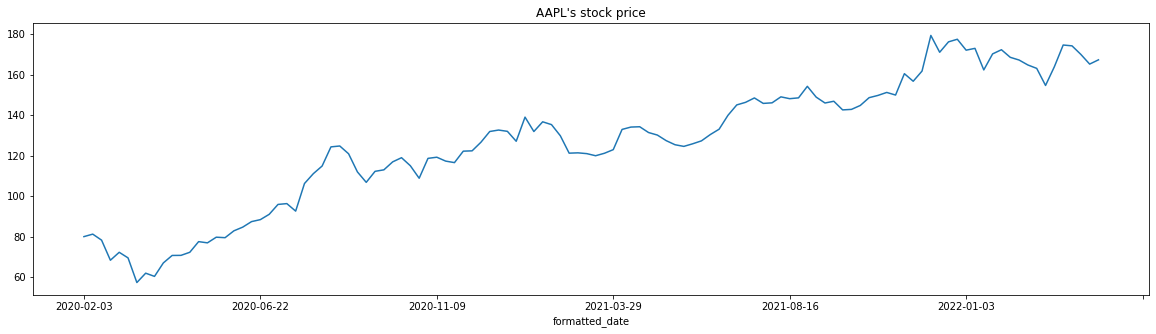

In [ ]:
plot('AAPL', 'close')

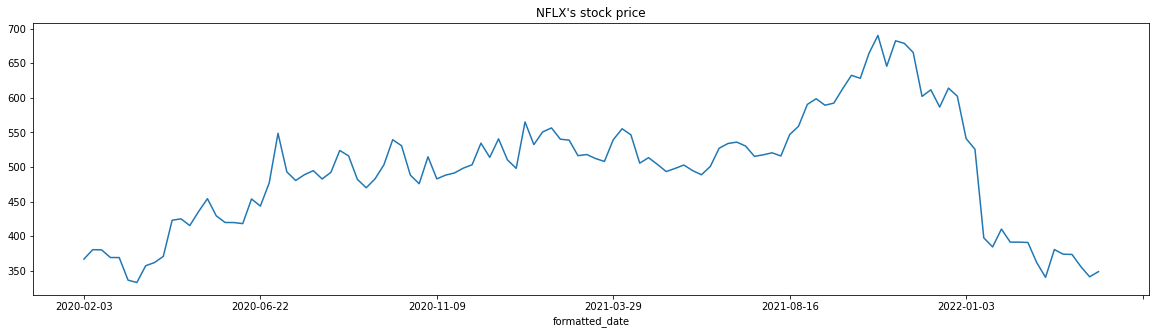

In [ ]:
plot('NFLX', 'close')

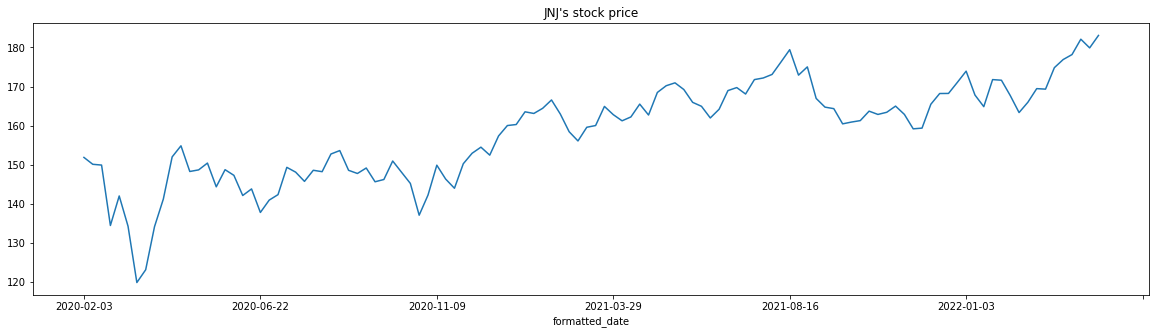

In [ ]:
plot('JNJ', 'close')

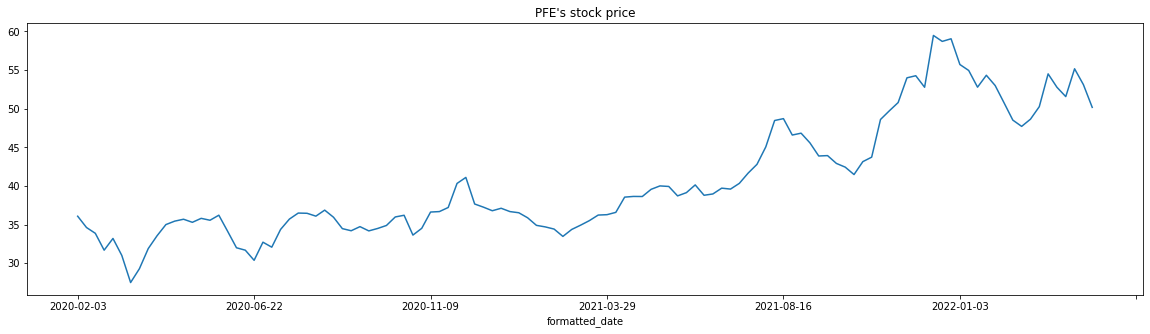

In [ ]:
plot('PFE', 'close')

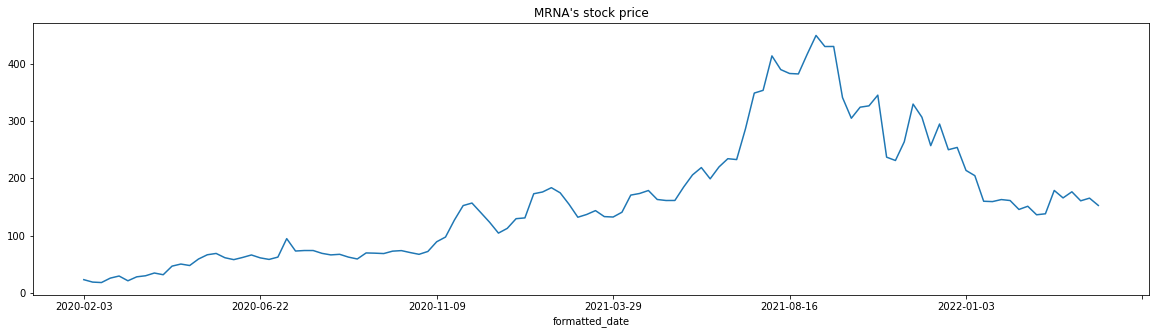

In [ ]:
plot('MRNA', 'close')

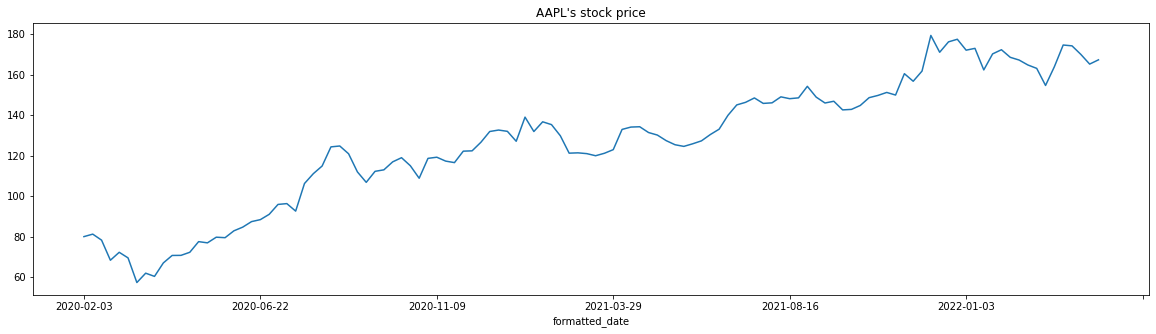

In [ ]:
plot('AAPL', 'close')

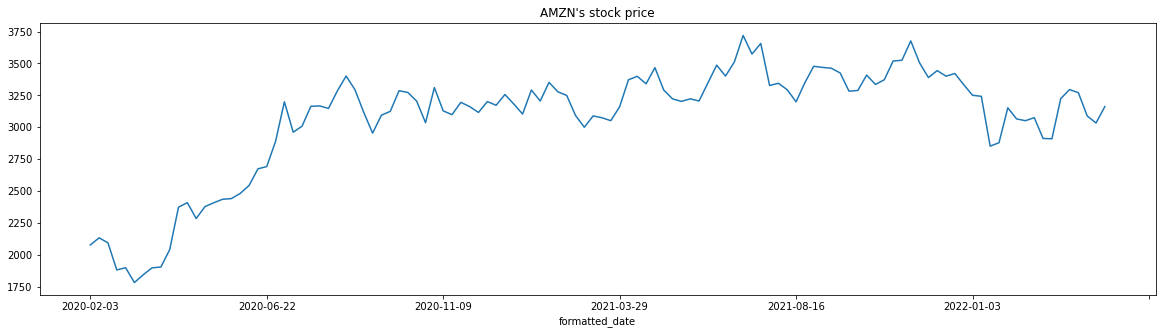

In [ ]:
plot('AMZN', 'close')

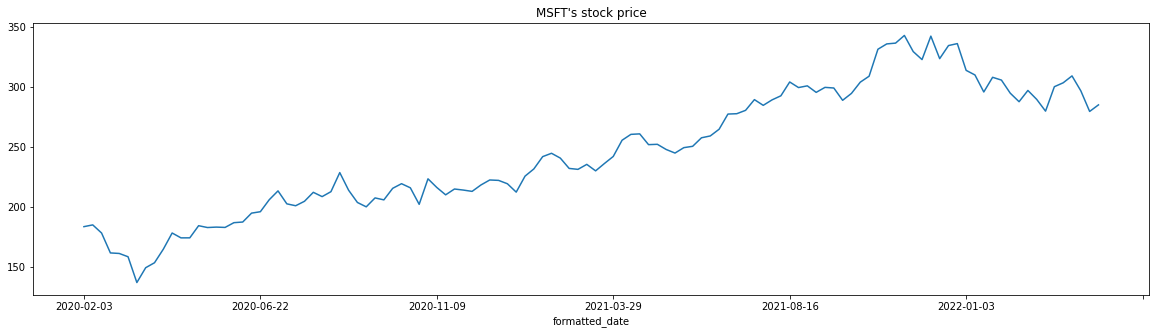

In [ ]:
plot('MSFT', 'close')

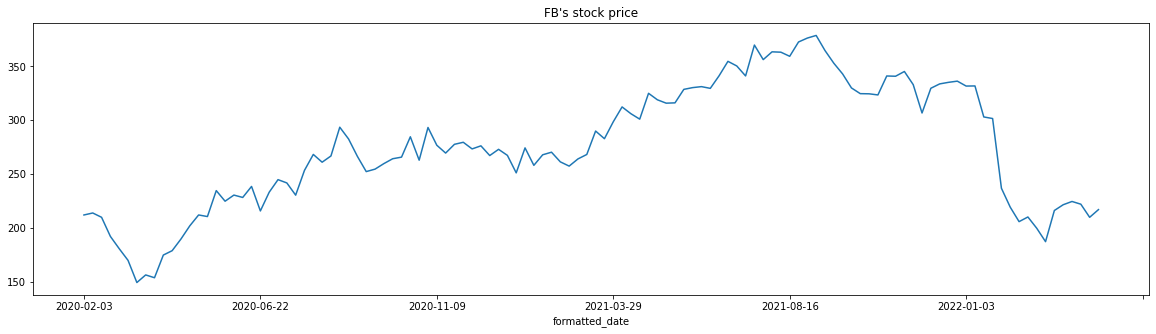

In [ ]:
plot('FB', 'close')

# Monthly

In [ ]:
def plot_m(name, feature):
  yahoo_financials = YahooFinancials(name)
  data = yahoo_financials.get_historical_price_data(start_date='2020-02-03', end_date='2022-04-20', time_interval='monthly')
  df = pd.DataFrame(data[name]['prices'])
  df = df.drop('date', axis=1).set_index('formatted_date') 
  df[feature].plot(title=name + "'s stock price", figsize=(20, 5))

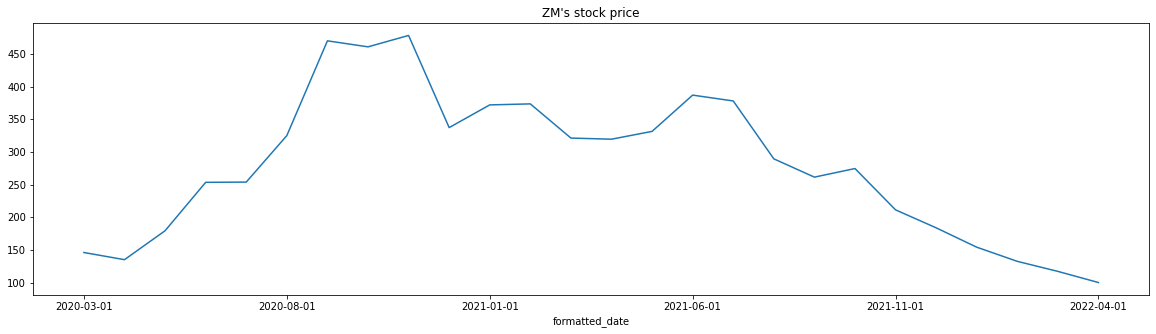

In [ ]:
plot_m('ZM', 'close')